# **TMNIST DATASET (94 Characters) PREDICTION**

This project is designed to classify characters from the TMNIST dataset, which contains 94 different character classes. Each record in the dataset has:
- **Font Name**: The first column represents the font name (e.g., *Chivo-Italic*, *Sen-Bold*).
- **Label**: The second column represents the label (a number from 0-9).
- **Pixel Values**: The remaining 784 elements represent the grayscale pixel values (ranging from 0-255) for a 28x28 pixel image.


## **Linking the Dataset**

- The dataset is linked and downloaded using Kaggle API commands.
- Commands are used to set up Kaggle authentication and download the TMNIST dataset file.



In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving archive (1).zip to archive (1).zip


In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download nikbearbrown/tmnist-alphabet-94-characters

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Dataset URL: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters
License(s): Attribution 3.0 Unported (CC BY 3.0)
 90% 76.0M/84.7M [00:00<00:00, 94.3MB/s]
100% 84.7M/84.7M [00:01<00:00, 82.8MB/s]


In [2]:
!unzip /content/tmnist-alphabet-94-characters.zip

Archive:  /content/tmnist-alphabet-94-characters.zip
  inflating: 94_character_TMNIST.csv  


## **Importing Required Libraries**

- The dataset file is unzipped and loaded into the environment for processing.
- The notebook imports necessary libraries such as pandas, numpy, matplotlib, and tensorflow.keras.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import warnings
warnings.filterwarnings("ignore")

## **Reading the Dataset**
- The TMNIST dataset is read from a CSV file using pandas.
- A preview of the dataset is displayed to understand its structure.

In [5]:
#reading the dataset
df=pd.read_csv('/content/94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Key Statistics from the DataFrame: Rows, Columns, Classes, and Fonts**


*   Rows represent individual data points, and columns represent the different attributes or features associated with each data point. It helps us understand the size and structure of the data.
*   Unique classes (categories or groups) in the 'labels' represent the different types of objects or categories we are trying to classify or predict. It also displays the unique labels present in the 'labels' column, which gives us an idea of the different categories in the data.
*   Font column likely represents the different font styles used in the dataset, which could be important for understanding the diversity of fonts used in the data. It helps us identify how many different types of fonts are present in the data.



In [6]:
num_rows, num_cols = df.shape
#Number of rows in dataframe
print('The number of rows:', num_rows)
#Number of columns in dataframe
print('The number of columns:', num_cols)

#
num_classes = df['labels'].nunique()
#Total number of unique labels
print('The number of classes:', num_classes)
print('The labels are:', df['labels'].unique())

#Total number of unique fonts
num_fonts = df['names'].nunique()
print('The number of different types of fonts:', num_fonts)

The number of rows: 274093
The number of columns: 786
The number of classes: 94
The labels are: ['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
The number of different types of fonts: 2990


## **Visualizing Image Data with Class Labels from DataFrame**



*   **Feature columns and class column:** Code defines what data attributes to use as input features (feature columns) and what category to predict (class column).

*   **Displaying images:** Code uses matplotlib to show a set of images with their corresponding class labels for visual understanding.

*   **Printing shape of feature matrix and target labels:** Code displays the dimensions of the data, including the number of data points and features, and the number of target labels for reference.



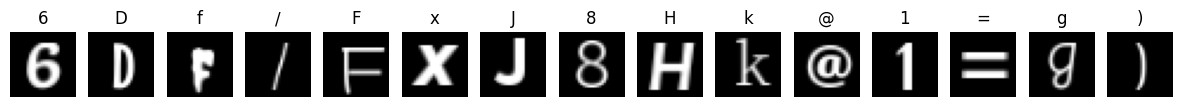

(274093, 784)
(274093,)


In [7]:
class_column = 'labels'
feature_columns = ['names']

X = df.drop(feature_columns + [class_column], axis=1)
y = df[class_column]  # Define the y variable as the class column

fig, axes = plt.subplots(1, 15, figsize=(15, 6))
for i, ax in enumerate(axes):
    ax.set_title(y.iloc[i])  # Update to use the y variable for class labels
    ax.imshow(X.values[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.axis('off')
plt.show()

print(X.shape)  # Print the shape of X (the feature matrix)
print(y.shape)  # Print the shape of y (the target labels)

## **Splitting Data into Train and Test Sets**


###**Purpose of Splitting the Dataset**

- **Training Set:** Used to train the model. The model learns the patterns and relationships in the data through this set.
- **Test Set:** Used to evaluate the model's performance on unseen data. This helps determine how well the model generalizes to new, unseen inputs.


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [9]:
print(X_train)
print(X_test)

          1    2    3    4    5    6    7    8    9   10  ...  775  776  777  \
198215  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41087   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
165138  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
177019  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
72101   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
119879  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
259178  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
131932  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
146867  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
121958  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        778  779  780  781  782  783  7

In [10]:
print(Y_train)
print(Y_test)


198215    :
41087     ,
165138    x
177019    q
72101     c
         ..
119879    _
259178    7
131932    f
146867    y
121958    p
Name: labels, Length: 219274, dtype: object
86512     &
251935    '
136848    i
188895    v
173187    /
         ..
61462     B
160091    i
5329      =
122041    @
246919    h
Name: labels, Length: 54819, dtype: object


## **Normalizing Pixel Values**

We scale down the pixel values of our images to a range between 0 and 1 to improve the performance of our neural network models.

In [11]:
#To improve the performance of our neural network models, we normalize the pixel values,
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

## **Converting Class Labels to Binary Representation using One Hot Encoding**








*   Encoding the categorical labels of our data using a one-hot encoding technique to represent them as binary values, which can be easily understood by the neural network models.
*   Convert the labels into a numerical format that the neural network can process, improving its ability to learn and make accurate predictions.



In [13]:
from sklearn.preprocessing import OneHotEncoder

# Feature digitization using one hot encoder
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
Y_train = enc.fit_transform(Y_train.values.reshape(-1, 1))
Y_test = enc.transform(Y_test.values.reshape(-1, 1))


## **Reshaping Grayscale Images**

Reshaping the grayscale images from their original shape into a standardized size of 28x28 pixels, which is a common format for image recognition tasks.

In [15]:
# Reshape grayscale images to 28x28
image_height = 28
image_width = 28

# Convert DataFrame to NumPy array and reshape
X_train = X_train.values.reshape(X_train.shape[0], image_height, image_width)
X_test = X_test.values.reshape(X_test.shape[0], image_height, image_width)



## **Building a Neural Network**



*  Creating a basic neural network model using the Keras Sequential API, which allows us to stack layers on top of each other to create a feedforward neural network.
*   The model consists of multiple dense (fully connected) layers with different numbers of hidden units and activation functions (ReLU) to learn complex patterns from the input data.
* The last layer of the model uses the softmax activation function to output predicted probabilities for each class in the dataset, and the Adam optimizer is used to optimize the model's parameters during training. The model's architecture and summary are displayed for reference.



In [16]:
#we choose a basic Neural Network to finish our mission
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 94)                  │           3,102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474,814 (1.81 MB)

 Trainable params: 474,814 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

## **Fitting the model**
I train the model using the training dataset (X_train, Y_train) and evaluate its performance using the validation set (X_test, Y_test) after each epoch. The training process is controlled by the following key parameters:

*   Epochs: The model is trained for 20 iterations over the entire training data.
*   Batch Size: We use a batch size of 1024, meaning the model updates its weights after processing 1024 samples at a time.
*   Verbose: Setting verbose=2 provides progress updates with each epoch.
*   Validation Data: Helps monitor the model's generalization performance on unseen data.


In [18]:
#fitting the model
model_history=model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), verbose=2,batch_size=1024)

Epoch 1/20
215/215 - 14s - 66ms/step - accuracy: 0.9288 - loss: 0.2152 - val_accuracy: 0.9069 - val_loss: 0.3207
Epoch 2/20
215/215 - 12s - 54ms/step - accuracy: 0.9321 - loss: 0.2035 - val_accuracy: 0.9057 - val_loss: 0.3223
Epoch 3/20
215/215 - 23s - 109ms/step - accuracy: 0.9333 - loss: 0.1982 - val_accuracy: 0.9081 - val_loss: 0.3181
Epoch 4/20
215/215 - 20s - 95ms/step - accuracy: 0.9348 - loss: 0.1926 - val_accuracy: 0.9081 - val_loss: 0.3197
Epoch 5/20
215/215 - 13s - 59ms/step - accuracy: 0.9368 - loss: 0.1862 - val_accuracy: 0.9069 - val_loss: 0.3266
Epoch 6/20
215/215 - 23s - 105ms/step - accuracy: 0.9391 - loss: 0.1788 - val_accuracy: 0.9099 - val_loss: 0.3196
Epoch 7/20
215/215 - 12s - 55ms/step - accuracy: 0.9402 - loss: 0.1742 - val_accuracy: 0.9030 - val_loss: 0.3401
Epoch 8/20
215/215 - 23s - 107ms/step - accuracy: 0.9427 - loss: 0.1667 - val_accuracy: 0.9096 - val_loss: 0.3251
Epoch 9/20
215/215 - 25s - 117ms/step - accuracy: 0.9441 - loss: 0.1612 - val_accuracy: 0.910

## **Calculating Accuracy & Loss**
After training the model, it is important to evaluate its performance on the test set. This helps determine how well the model generalizes to new, unseen data.

In this section, we:
Predict the labels for the test data using the trained model.
Evaluate the model's accuracy and loss using the model.evaluate() function.


In [23]:
# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = model.evaluate(X_test, Y_test)[1]

# Calculate loss
test_loss = model.evaluate(X_test, Y_test)[0]

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9129 - loss: 0.3583
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9129 - loss: 0.3583
Test loss: 0.36209264397621155
Test accuracy: 0.9132599830627441


## **Accuracy and Loss vs Epochs Graphs**

Plotting accuracy and loss values of a neural network model during training, using two subplots to show the trends over epochs.

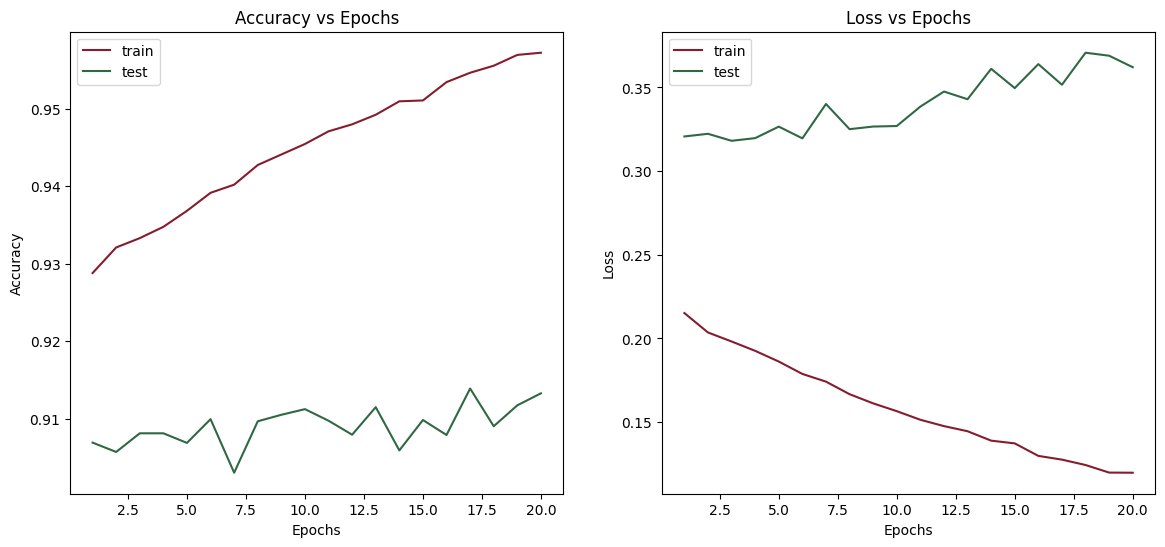

In [22]:
# Extract accuracy and loss values from model_history
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy vs epochs
axs[0].plot(epochs, accuracy, label='train', color='#851D2D')
axs[0].plot(epochs, val_accuracy, label='test', color='#306844')
axs[0].set_title('Accuracy vs Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs epochs
axs[1].plot(epochs, loss, label='train', color='#851D2D')
axs[1].plot(epochs, val_loss, label='test', color='#306844')
axs[1].set_title('Loss vs Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Display the plots
plt.show()

# **Conclusion**
In this project, I built and trained a neural network model to classify characters from the TMNIST dataset, which consists of 94 different character classes. Through the process of data preparation, model training, and evaluation, achieved the following key results:
*   **Final Test Accuracy:** The model achieved a test accuracy of approximately 91.33%, indicating that it can correctly predict around 91% of the unseen test data.
*   **Final Test Loss:** The model's test loss was approximately 0.362, reflecting the degree of error in the model's predictions.





# **References**
1. https://en.wikipedia.org/wiki/Convolutional_neural_network
2. https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
3. https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4
4. https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6


# **LICENSE**

MIT License

Copyright (c) 2024 Poornachandra Kongara



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

<br>

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

<br>



THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.